In [3]:
from sklearn import datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

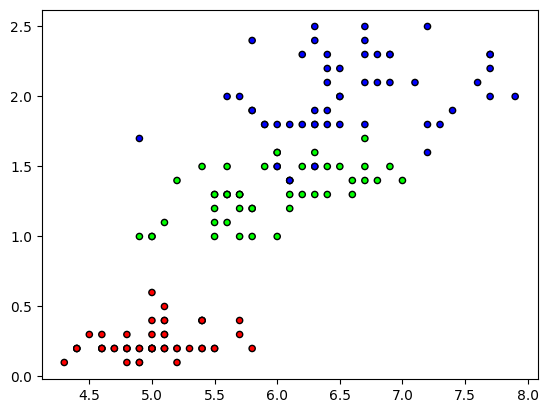

In [11]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmp = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure()
plt.scatter(X[:, 0], X[:, 3], c=y, cmap=cmp, edgecolors='k', s=20)
plt.show()

In [12]:
import numpy as np

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum(x1 - x2)**2)

In [18]:
from collections import Counter
class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)

    def _predict(self, x):
        # compute distance
        distances = [euclidean_distance(x, x_train) for x_train in X_train]

        # get knn
        k_indices = np.argsort(distances)[:self.k]
        k_labels = [self.y_train[i] for i in k_indices]

        # majority vote
        most_common = Counter(k_labels).most_common(1)

        return most_common[0][0]

In [22]:
clf = KNN(5)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
acc = np.sum(predictions == y_test) / len(y_test)
print(acc)

0.9666666666666667
